## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:机器学习更加灵活，处理问题适应性更强。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:完全随机，没有方向性。试错成本高，时间周期长。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:是的。对选择的结果进行判断反馈，指导下一次优化的方向。缺点：变化幅度固定，在正确的方向上改变还是不够快，可以更快；二次方向选择是还是随机的，尽管选项少，但缺失选择的方向，存在一定的试错时间浪费。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [142]:
# informations

import requests

#content_from_url = requests.get(url_start,headers = kv,allow_redirects=False)
url_start = "https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485"
url_test = 'http://www.baidu.com'

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0.3 Safari/605.1.15'}

content_from_url = requests.get(url_start,headers = headers)

#print(content_from_url.content.decode())
with open('railway.txt','w') as code:
    code.write(str(content_from_url.content.decode()))

In [296]:
import re

#获取站位名称
raw_data ="""<td width="204" align="center" valign="middle" colspan="1" rowspan="2"><a target="_blank" href="/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF">北京地铁八通线</a></td>"""

need_information_backup =r'<td\swidth=\"204\"\salign=\"center\"\svalign=\"middle\"\scolspan=\"1\"\srowspan=\"2\"><a\starget=_blank\shref=\"(/item/[\%A-Z0-9/]*)\">(\w+)</a></td>'

need_information =r'<td\swidth=\"204\"\salign=\"center\"\svalign=\"middle\"\scolspan=\"1\"\srowspan=\"2\"><a\starget=_blank\shref=\"(/item/[\%A-Z0-9/]*)\">(\w+)</a></td>'

stationforall=r'<a\starget=_blank\shref="(/item/[\%A-Z0-9/]*)">(\w+)</a>'

url_station8 = '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/897830'

pattern =re.compile(need_information)

file_content = open('railway.txt')
last_content = file_content.read()

result = pattern.findall(last_content)

print(len(result))  #缺8号线。

for i in result:
    print(i)
    

17
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF', '北京地铁1号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF', '北京地铁2号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF', '北京地铁4号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF', '北京地铁5号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF', '北京地铁6号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF', '北京地铁7号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF', '北京地铁9号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF', '北京地铁10号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF', '北京地铁13号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF', '北京地铁15号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF', '北京地铁16号线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF', '北京地铁八通线')
('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%

In [298]:
url_root = 'https://baike.baidu.com'
station = {}
for url,station_name in result:
    station[station_name] = url_root + url
station['北京地铁8号线']=url_root + url_station8
station

{'北京地铁1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '北京地铁2号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
 '北京地铁4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '北京地铁5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '北京地铁6号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 '北京地铁7号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
 '北京地铁9号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 '北京地铁10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '北京地铁13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 '北京地铁15号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA

In [433]:
# 地铁线路站名抓取

data_raw_station = '<td align="center" valign="middle" colspan="1" rowspan="1">苹果园</td>'

need_information_station = []

station_1 = r'<td\salign=\"center\"\svalign=\"middle\"\scolspan=\"1\"\srowspan=\"1\">([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</td>'
station_2 = r'<tr><th>([\u4E00-\u9FA5]+)</th><td\swidth=\"\d+\"\salign=\"middle\"\svalign=\"center\">[—0-9:]*</td>'
station_4 = station_1
station_5 = r'tr><th\salign=\"center\"\svalign=\"middle\">([\u4E00-\u9FA5]+)</th><td\swidth=\"\d+\"\sheight=\"\d+\"\salign=\"center\"\svalign=\"middle\">\d:'
station_6 = r'<tr><th>([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</th><td>.*?[0-9]:[0-9]{2}</td>'
station_7 = r'<tr><th>([\u4E00-\u9FA5]+)</th><td\swidth=\"\d+\"\salign=\"center\"\svalign=\"middle\">.*?[0-9]:[0-9]{2}</td>'
station_9 = station_6
station_10 = r'<tr><td\swidth=\"[0-9]{2}\"\salign=\"middle\"\svalign=\"center\">([\u4E00-\u9FA5]+)</td>.*?[0-9]:[0-9]{2}</td>'
station_13 = r'tr><th\salign=\"center\"\svalign=\"middle\">([\u4E00-\u9FA5]+)</th><td\swidth=\"[0-9]{2}\"\salign=\"center\"\svalign=\"middle\">[—0-9:]*</td>'
station_15 = station_13
station_16 = r'<tr><th>([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</th><td\salign=\"center\"\svalign=\"middle\">[—0-9:]*</td>'
station_bt = r'<tr><th\salign=\"center\"\svalign=\"middle\">([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</th><td\swidth=\"\d+\"\salign=\"center\"\svalign=\"middle\">[—0-9:]*</td>'
station_cp = r'<tr><th\swidth=\"[0-9]{2}\">([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</th><td width=\"\d+\"\salign=\"center\"\svalign=\"middle\">[—0-9:]*</td>'
station_yz = r'<div\sclass=\"para\"\slabel-module=\"para\"><a\starget=_blank\shref=\"/item/[%A-Z0-9/\"\sa-z-=]*>([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</a></div>'
station_fs = r'<tr><th\salign=\"center\"\svalign=\"middle\">([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</th><td\swidth=\"\d+\"\salign=\"center\"\svalign=\"middle\">[—0-9:]*</td>'
station_s1 = r'<tr><td\swidth=\"\d+\"\salign=\"center\"\svalign=\"top\">([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</td><td\swidth=\"\d+\"\salign=\"center\"\svalign=\"[a-z]*\">[—0-9:]*</td>'
station_yf = r'<tr><th\swidth=\"\d+\">([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</th><td\swidth=\"\d+\"\svalign=\"top\">[—0-9:]*</td>'
station_8 = r'<tr><th\swidth=\"\d+\">([\u4E00-\u9FA5]{2}[\u4E00-\u9FA5]*?)</th><td\swidth=\"119\"\salign=\"center\"\svalign=\"middle\">[—0-9:]*</td>'

need_information_station = [station_1,station_2,station_4,station_5,station_6,station_7,station_9,station_10,station_13,station_15,station_16,station_bt,station_cp,station_yz,station_fs,station_s1,station_yf,station_8]

station_details = {}
i= 0
for name,_ in station.items():
    if(i<len(need_information_station)):
        array_ = re.compile(need_information_station[i]).findall(requests.get(_,headers = headers).content.decode(errors='ignore'))
        station_details[name]=array_
    i= i+ 1

In [434]:
station_details

{'北京地铁1号线': ['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东'],
 '北京地铁2号线': ['西直门',
  '积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门',
  '车公庄'],
 '北京地铁4号线': ['安河桥北',
  '北宫门',
  '西苑',
  '圆明园',
  '北京大学东门',
  '中关村',
  '海淀黄庄',
  '人民大学',
  '魏公村',
  '国家图书馆',
  '动物园',
  '西直门',
  '新街口',
  '平安里',
  '西四',
  '灵境胡同',
  '西单',
  '宣武门',
  '菜市口',
  '陶然亭',
  '北京南站',
  '马家堡',
  '角门西',
  '公益西桥'],
 '北京地铁5号线': ['宋家庄',
  '刘家窑',
  '蒲黄榆',
  '天坛东门',
  '磁器口',
  '崇文门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '和平里北街',
  '和平西桥',
  '惠新西街南口',
  '惠新西街北口',
  '大屯路东',
  '北苑路北',
  '立水桥南',
  '立水桥',
  '天通苑南',
  '天通苑'],
 '北京地铁6号线': ['金安桥',
  '苹果园',
  '西黄村',
  '廖公庄',
  '田村',
  '海淀五路居',
  '慈寿寺',
  '花园桥',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东

In [435]:
station['北京地铁13号线'],station_details['北京地铁8号线']

('https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 ['育知路',
  '平西府',
  '回龙观东大街',
  '霍营',
  '育新',
  '西小口',
  '永泰庄',
  '林萃桥',
  '森林公园南门',
  '奥林匹克公园',
  '奥体中心',
  '北土城',
  '安华桥',
  '安德里北街',
  '鼓楼大街',
  '什刹海',
  '南锣鼓巷',
  '中国美术馆'])

In [441]:
#构建函数将每个站点相连接的站取出。

from collections import defaultdict

station_dict = defaultdict(dict)

#station_dict['h'].update({0:9})

def station_list(stations):
    
    new_dict=defaultdict(dict)
    for _,con in enumerate(stations):
        if _==0:
            new_dict[con] = set((stations[_+1],))
            continue
        if _ == len(stations)-1:
            new_dict[con] = set((stations[_-1],))
            continue
            
        new_dict[con]={stations[_-1],stations[_+1]}
    
    return new_dict

In [442]:
a = station_list(station_details['北京地铁13号线'])
print(a)

defaultdict(<class 'dict'>, {'西直门': {'大钟寺'}, '大钟寺': {'西直门', '知春路'}, '知春路': {'大钟寺', '五道口'}, '五道口': {'上地', '知春路'}, '上地': {'西二旗', '五道口'}, '西二旗': {'上地', '龙泽'}, '龙泽': {'西二旗', '回龙观'}, '回龙观': {'龙泽', '霍营'}, '霍营': {'立水桥', '回龙观'}, '立水桥': {'霍营', '北苑'}, '北苑': {'立水桥', '望京西'}, '望京西': {'芍药居', '北苑'}, '芍药居': {'光熙门', '望京西'}, '光熙门': {'芍药居', '柳芳'}, '柳芳': {'光熙门', '东直门'}, '东直门': {'柳芳'}})


In [443]:
#将所有线路中的站位信息合并
def calc_station(station_line):
    for _ in station_line:
        new_result = station_list(_)
        for _next in new_result.keys():
            if _next in station_dict:
                station_dict[_next] = station_dict[_next] | new_result[_next]
                continue
            station_dict[_next] = new_result[_next]
    return station_dict   

In [444]:
all_stations = calc_station(list(station_details.values()))

In [396]:
all_stations['西直门'],all_stations['草桥'],all_stations['西单'],all_stations['角门西']

({'动物园', '大钟寺', '新街口', '积水潭'},
 {'纪家庙', '角门西'},
 {'复兴门', '天安门西', '宣武门', '灵境胡同'},
 {'公益西桥', '草桥', '角门东', '马家堡'})

In [ ]:
#画图，所有地铁站连接图

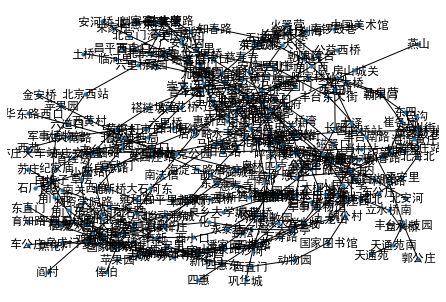

In [445]:
import networkx as station_draft

%matplotlib inline

import matplotlib.pyplot as plt

#station_graph.add_nodes_from(list(all_stations.keys()))

for _ in list(station_details.values()):
    
    station_graph = station_draft.path_graph(_)
    station_draft.draw(station_graph,with_labels=True, node_size=10)

#station_graph.add_nodes_from(list(all_stations.keys()))


In [446]:
#将地铁站集合转为数组：

for i,j in list(all_stations.items()):
    all_stations[i] = list(j)
all_stations

defaultdict(dict,
            {'苹果园': ['西黄村', '古城', '金安桥'],
             '古城': ['八角游乐园', '苹果园'],
             '八角游乐园': ['八宝山', '古城'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['万寿路', '玉泉路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['莲花桥', '西钓鱼台', '万寿路', '军事博物馆'],
             '军事博物馆': ['白堆子', '木樨地', '北京西站', '公主坟'],
             '木樨地': ['南礼士路', '军事博物馆'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['长椿街', '西单', '阜成门', '南礼士路'],
             '西单': ['灵境胡同', '天安门西', '宣武门', '复兴门'],
             '天安门西': ['天安门东', '西单'],
             '天安门东': ['王府井', '天安门西'],
             '王府井': ['东单', '天安门东'],
             '东单': ['王府井', '崇文门', '灯市口', '建国门'],
             '建国门': ['东单', '朝阳门', '北京站', '永安里'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['金台夕照', '大望路', '永安里', '双井'],
             '大望路': ['四惠', '国贸'],
             '四惠': ['四惠东', '大望路'],
             '四惠东': ['四惠', '高碑店'],
             '西直门': ['积水潭', '动物园', '新街口'

In [454]:
#定义search函数地铁换乘路径搜索路径

def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)
  
def search(start, destination, connection_grpah=all_stations,sort_candidate=transfer_stations_first):
    
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            #print(pathes)
            
            if city == destination: return "{}到{} 换乘共计{}站：{}".format(start,destination,str(len(new_path)-1),'🚗-->'.join(new_path))
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制


In [455]:
result1,result2 = search('奥体中心', '天安门东'),search('奥体中心', '西直门')

result1,result2

('奥体中心到天安门东 换乘共计11站：奥体中心🚗-->北土城🚗-->安华桥🚗-->安德里北街🚗-->鼓楼大街🚗-->什刹海🚗-->南锣鼓巷🚗-->东四🚗-->灯市口🚗-->东单🚗-->王府井🚗-->天安门东',
 '奥体中心到西直门 换乘共计6站：奥体中心🚗-->北土城🚗-->安华桥🚗-->安德里北街🚗-->鼓楼大街🚗-->积水潭🚗-->西直门')

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)